# **17 Category Flower Classification**

### **Import libraries and modules**

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import h5py
import pickle
import tarfile
import glob
import h5py
import matplotlib.pyplot as plt
from urllib import request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

Load the dataset.

In [ ]:
train_labels = os.listdir('train_data/')
train_labels

['Bluebell',
 'Buttercup',
 'ColtsFoot',
 'Cowslip',
 'Crocus',
 'Daffodil',
 'Daisy',
 'Dandelion',
 'Fritillary',
 'Iris',
 'LilyValley',
 'Pansy',
 'Snowdrop',
 'Sunflower',
 'Tigerlily',
 'Tulip',
 'Windflower']

### **Pre-processing the data**

In [ ]:
train_labels.sort()

-Two empty lists, X and y, are initialized to store the extracted features and labels.

-I have a loop iterating over train_labels.

-Inside the loop, I am constructing a directory path using os.path.join, assuming the images are stored in a folder called 'train_data' with a subfolder for each label.

-then I am assigning the current label to the variable current_label.
-The current folder (label) is printed using print('Current Folder: ' + current_label).

-Another loop from 1 to 80 (inclusive) is started to iterate over the images.

-The current image number is printed using print('Current Image: ' + str(x)).

-The image file path is constructed using os.path.join and read using cv2.imread.

-The image is resized to a shape of (500, 500) using cv2.resize.

-The image is converted from BGR to HSV color space using cv2.cvtColor.

-A 3D histogram is calculated using cv2.calcHist with 8 bins for each channel.

-The histogram is normalized using cv2.normalize.

-The histogram features are flattened into a 1D array using flatten.

-The image is converted to grayscale using cv2.cvtColor.

-The grayscale image is used to calculate Hu moments using cv2.HuMoments and flattened into a 1D array.

-The histogram and Hu moments features are concatenated using np.hstack.

-The concatenated features are appended to the list X, and the current label is appended to the list y.

In [ ]:
X = []
y = []
for label in train_labels:
    dir = os.path.join('train_data', label)
    current_label = label
    print('Current Folder: ' + current_label)
    for x in range(1, 81):
        print('Current Image: ' + str(x))
        file = os.path.join(dir, str(x) + '.jpg')
        image = cv2.imread(file)
        image = cv2.resize(image, (500, 500))
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)
        histogram_features = hist.flatten()
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hue_features = cv2.HuMoments(cv2.moments(image_gray)).flatten()
        current_features = np.hstack([histogram_features, hue_features])
        X.append(current_features)
        y.append(current_label)

Current Folder: Bluebell
Current Image: 1
Current Image: 2
Current Image: 3
Current Image: 4
Current Image: 5
Current Image: 6
Current Image: 7
Current Image: 8
Current Image: 9
Current Image: 10
Current Image: 11
Current Image: 12
Current Image: 13
Current Image: 14
Current Image: 15
Current Image: 16
Current Image: 17
Current Image: 18
Current Image: 19
Current Image: 20
Current Image: 21
Current Image: 22
Current Image: 23
Current Image: 24
Current Image: 25
Current Image: 26
Current Image: 27
Current Image: 28
Current Image: 29
Current Image: 30
Current Image: 31
Current Image: 32
Current Image: 33
Current Image: 34
Current Image: 35
Current Image: 36
Current Image: 37
Current Image: 38
Current Image: 39
Current Image: 40
Current Image: 41
Current Image: 42
Current Image: 43
Current Image: 44
Current Image: 45
Current Image: 46
Current Image: 47
Current Image: 48
Current Image: 49
Current Image: 50
Current Image: 51
Current Image: 52
Current Image: 53
Current Image: 54
Current Imag

Current Image: 62
Current Image: 63
Current Image: 64
Current Image: 65
Current Image: 66
Current Image: 67
Current Image: 68
Current Image: 69
Current Image: 70
Current Image: 71
Current Image: 72
Current Image: 73
Current Image: 74
Current Image: 75
Current Image: 76
Current Image: 77
Current Image: 78
Current Image: 79
Current Image: 80
Current Folder: Daisy
Current Image: 1
Current Image: 2
Current Image: 3
Current Image: 4
Current Image: 5
Current Image: 6
Current Image: 7
Current Image: 8
Current Image: 9
Current Image: 10
Current Image: 11
Current Image: 12
Current Image: 13
Current Image: 14
Current Image: 15
Current Image: 16
Current Image: 17
Current Image: 18
Current Image: 19
Current Image: 20
Current Image: 21
Current Image: 22
Current Image: 23
Current Image: 24
Current Image: 25
Current Image: 26
Current Image: 27
Current Image: 28
Current Image: 29
Current Image: 30
Current Image: 31
Current Image: 32
Current Image: 33
Current Image: 34
Current Image: 35
Current Image: 

Current Image: 46
Current Image: 47
Current Image: 48
Current Image: 49
Current Image: 50
Current Image: 51
Current Image: 52
Current Image: 53
Current Image: 54
Current Image: 55
Current Image: 56
Current Image: 57
Current Image: 58
Current Image: 59
Current Image: 60
Current Image: 61
Current Image: 62
Current Image: 63
Current Image: 64
Current Image: 65
Current Image: 66
Current Image: 67
Current Image: 68
Current Image: 69
Current Image: 70
Current Image: 71
Current Image: 72
Current Image: 73
Current Image: 74
Current Image: 75
Current Image: 76
Current Image: 77
Current Image: 78
Current Image: 79
Current Image: 80
Current Folder: Snowdrop
Current Image: 1
Current Image: 2
Current Image: 3
Current Image: 4
Current Image: 5
Current Image: 6
Current Image: 7
Current Image: 8
Current Image: 9
Current Image: 10
Current Image: 11
Current Image: 12
Current Image: 13
Current Image: 14
Current Image: 15
Current Image: 16
Current Image: 17
Current Image: 18
Current Image: 19
Current Imag

In [ ]:
np.shape(X)

(1360, 519)

In [ ]:
np.shape(y)

(1360,)

Now, I use label Encoder for the data labels, which are categorical.

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([ 0,  0,  0, ..., 16, 16, 16], dtype=int64)

Scaling the flattened images.

In [ ]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [ ]:
X

array([[3.13705491e-01, 5.55846596e-02, 0.00000000e+00, ...,
        3.86364541e-18, 5.25229139e-02, 1.98684164e-17],
       [4.13660545e-01, 2.76928505e-02, 4.24824605e-05, ...,
        3.86393164e-18, 5.20832902e-02, 1.98687437e-17],
       [8.07397387e-01, 1.49239223e-01, 0.00000000e+00, ...,
        3.86386667e-18, 5.21571241e-02, 1.98685039e-17],
       ...,
       [2.63134608e-01, 1.06193822e-01, 1.27563254e-01, ...,
        3.86375745e-18, 5.20505987e-02, 1.98688667e-17],
       [5.84949132e-04, 1.38654032e-03, 4.32320717e-02, ...,
        3.86393038e-18, 5.20833262e-02, 1.98687368e-17],
       [9.12752606e-05, 7.32482080e-03, 2.96973376e-03, ...,
        3.86393830e-18, 5.20651840e-02, 1.98687110e-17]])

**Save the processed data**

In [ ]:
h5_X = h5py.File('data/X.h5', 'w')
h5_X.create_dataset('features', data=np.array(X))

<HDF5 dataset "features": shape (1360, 519), type "<f8">

In [ ]:
h5_y = h5py.File('data/y.h5', 'w')
h5_y.create_dataset('targets', data=np.array(y))

<HDF5 dataset "targets": shape (1360,), type "<i8">

In [ ]:
h5_X.close()
h5_y.close()

**Read the processed data**

Read the processed data, in case it needs changes in future.

In [ ]:
with open('data/le.h5', 'wb') as f:
    pickle.dump(le, f)

In [ ]:
with open('data/mms.h5', 'wb') as f:
    pickle.dump(mms, f)

Calculating and flattening the histogram features of the image in the HSV color space.
The resulting flattened histogram can be used as a feature vector for further processing or analysis.

In [ ]:
img = cv2.imread('train_data/Bluebell/1.jpg')

In [ ]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [ ]:
image = cv2.resize(img, (500, 500))
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
cv2.normalize(hist, hist)
image_histogram = hist.flatten()

In [ ]:
np.shape(image_histogram)

(512,)

In [ ]:
image_hsv

array([[[ 15,  79, 103],
        [ 15,  86,  95],
        [ 15,  91,  87],
        ...,
        [ 43, 255,  14],
        [ 47, 255,  14],
        [ 47, 255,  14]],

       [[ 15,  76, 107],
        [ 15,  83,  98],
        [ 15,  88,  90],
        ...,
        [ 43, 255,  14],
        [ 47, 255,  14],
        [ 47, 255,  14]],

       [[ 15,  73, 112],
        [ 15,  78, 104],
        [ 15,  84,  94],
        ...,
        [ 43, 255,  14],
        [ 47, 255,  14],
        [ 47, 255,  14]],

       ...,

       [[  0,  42,  98],
        [  0,  42,  98],
        [  0,  42,  98],
        ...,
        [ 41, 111, 103],
        [ 42, 118,  99],
        [ 42, 129,  91]],

       [[  0,  44,  92],
        [  0,  44,  92],
        [  0,  44,  93],
        ...,
        [ 40, 104, 105],
        [ 41, 108, 104],
        [ 41, 127,  90]],

       [[  0,  46,  88],
        [  0,  46,  88],
        [  0,  46,  89],
        ...,
        [ 40, 100, 110],
        [ 41, 103, 109],
        [ 41, 125,  92]]

In [ ]:
np.shape(img)

(500, 611, 3)

In [ ]:
print(img[0])

[[ 72  88 104]
 [ 66  82  98]
 [ 58  74  90]
 ...
 [  0  13   7]
 [  0  14   6]
 [  0  14   6]]


The histogram representes the distribution of pixel values in the grayscale image img. Each bin in the histogram will correspond to a range of pixel values, and the bin values will indicate the frequency or count of pixels falling within that range.

In [ ]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

In [ ]:
hist

array([[2.4838e+04],
       [6.9120e+03],
       [7.2310e+03],
       [6.9980e+03],
       [6.9070e+03],
       [6.8040e+03],
       [6.3510e+03],
       [6.4240e+03],
       [6.0190e+03],
       [5.6770e+03],
       [5.4690e+03],
       [5.3440e+03],
       [5.0670e+03],
       [4.8910e+03],
       [4.6590e+03],
       [4.4720e+03],
       [4.1900e+03],
       [4.0190e+03],
       [3.9750e+03],
       [3.7980e+03],
       [3.6210e+03],
       [3.5090e+03],
       [3.4110e+03],
       [3.4040e+03],
       [3.2050e+03],
       [3.1180e+03],
       [3.0220e+03],
       [3.0360e+03],
       [2.9270e+03],
       [2.8630e+03],
       [2.7270e+03],
       [2.6650e+03],
       [2.5790e+03],
       [2.4550e+03],
       [2.3500e+03],
       [2.3270e+03],
       [2.2280e+03],
       [2.3490e+03],
       [2.3960e+03],
       [2.4250e+03],
       [2.3730e+03],
       [2.3890e+03],
       [2.4850e+03],
       [2.3940e+03],
       [2.2770e+03],
       [2.3360e+03],
       [2.2330e+03],
       [2.108

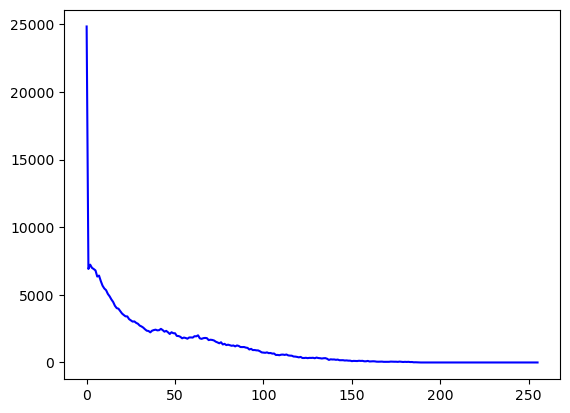

In [ ]:
plt.plot(hist, color='blue')

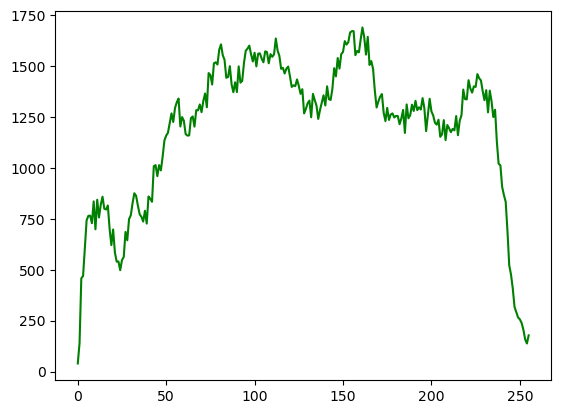

In [ ]:
hist = cv2.calcHist([img], [1], None, [256], [0, 256])
plt.plot(hist, color='green')

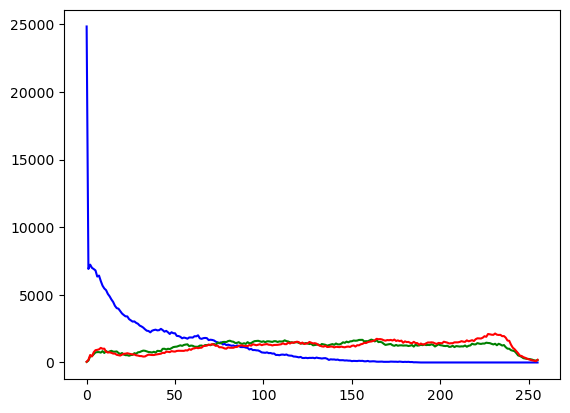

In [ ]:
for channel, col in enumerate(('b', 'g', 'r')):
        hist = cv2.calcHist([img], [channel], None, [256], [0, 256])
        plt.plot(hist, color=col)

In [ ]:
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hue_features = cv2.HuMoments(cv2.moments(grayImg)).flatten()

The resulting hue_features will be a one-dimensional array containing the seven Hu Moments that represent shape or texture features of the grayscale image.

In [ ]:
hue_features

array([ 1.13115987e-03,  1.52695277e-08,  3.54396481e-11,  2.20732752e-11,
       -1.09707513e-22,  9.91670412e-16, -6.07543273e-22])

Load data from the 'features' and 'targets' datasets in the 'X.h5' and 'y.h5' HDF5 files respectively and store them in the NumPy arrays X and y.

In [ ]:
X = np.array(h5py.File(os.path.join('data', 'X.h5'), 'r')['features'])
y = np.array(h5py.File(os.path.join('data', 'y.h5'), 'r')['targets'])

In [ ]:
np.shape(y)

(1360,)

Divide the dataset into two subsets: one for training the model and the other for evaluating its performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### **Build the model**

Using a RandomForestClassifier from scikit-learn to train our model.

In [ ]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47        18
           1       0.50      0.37      0.42        19
           2       0.66      0.81      0.72        26
           3       0.76      0.73      0.74        22
           4       0.59      0.74      0.65        23
           5       0.54      0.47      0.50        15
           6       0.74      0.80      0.77        25
           7       0.75      0.58      0.65        26
           8       0.88      0.30      0.45        23
           9       0.80      1.00      0.89        12
          10       0.64      0.58      0.61        24
          11       0.56      0.23      0.32        22
          12       0.62      0.89      0.73        18
          13       0.83      0.94      0.88        16
          14       0.38      0.73      0.50        11
          15       0.57      0.73      0.64        22
          16       0.67      0.78      0.72        18

    accuracy              